IMPORT LIBRARIES

In [ ]:
from google.colab import drive
import keras
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from nltk.stem import WordNetLemmatizer 
import string
import nltk
import tensorflow as tf
nltk.download('stopwords')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

MOUNT THE DRIVE




In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


CHECKING DATA INFO

In [ ]:


df = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/disaster_tweets/train.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/disaster_tweets/test.csv")

df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1




CREATED DUPLICATE DATAFRAME

In [ ]:
df1 = df.iloc[:, [0,3,4]]
df  = df.iloc[:, [3,4]]

df1

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [ ]:
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


PREPROCESSING

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
import nltk
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

# def Standardization(text):
#   text = text.lower()
#   text = re.sub(r'@\w+', '', text)
#   text = re.sub(r'http:\S+', '', text)
#   text = re.sub(r'[^\w\s]', '', text)
#   text = [w for w in text.split() if w not in stop_words]
#   return " ".join(text)

def removeStopWords(text):
    """
    Filter words that are not found in stop words
    """
    return " ".join([word for word in text.split() if word not in stopwords.words("english")])


def removePunctuation(text):
    """
    Remove punctuation symbols and convert text to lowercase
    """
    return text.lower().translate(str.maketrans('', '', string.punctuation))

def calculateMaxSeqLen(texts):
    """
    Calculates the maximum sequence length found in the corpus
    """
    max_len = float('-inf')
    for text in texts:
        if len(text.split()) > max_len:
            max_len = len(text.split())
            
    return max_len

def lemmatize(text):
    """
    Filter words that are not found in stop words
    """
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_certain_numbers(text):
    return text.replace('20', ' ')



#df1["text"] = df1.loc[:,"text"]
# Target Selection
y = df.loc[:,"target"]

#X1_test = df_test.loc[:,"text"]


df1["text"] = df1["text"].apply(removeStopWords)
df1["text"] = df1["text"].apply(removePunctuation)
df1["text"] = df1["text"].apply(remove_certain_numbers)
df1["text"] = df1["text"].apply(lemmatize)


# X1_test = X1_test.apply(removeStopWords)
# X1_test = X1_test.apply(removePunctuation)
# X1_test = X1_test.apply(remove_certain_numbers)
# X1_test = X1_test.apply(lemmatize)




[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df1.head()

,id,text,target
0,1,our deed reason earthquake may allah forgive u,1
1,4,forest fire near la ronge sask canada,1
2,5,all resident asked shelter place notified offi...,1
3,6,13000 people receive wildfire evacuation order...,1
4,7,just got sent photo ruby alaska smoke wildfire...,1


INSTALL NLPAUG WHICH IS USED FOR AUGMENTATION

In [ ]:
! pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 14.9 MB/s 


In [ ]:
import nlpaug.augmenter.word as naw


INSTALL TRANSFORMERS

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 14.2 MB/s 
     |████████████████████████████████| 182 kB 56.6 MB/s 
     |████████████████████████████████| 7.6 MB 52.9 MB/s 


In [ ]:
# aug = naw.ContextualWordEmbsAug(
#     model_path='bert-base-uncased', action="insert")
# augmented_text = aug.augment("The quick brown fox jumps over the lazy dog")

In [ ]:
# augmented_text

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet', model_path='/content/gdrive/MyDrive/MachineLearning/disaster_tweets/glove.6B.100d.txt', name='Synonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', 
                     stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, force_reload=False, 
                     verbose=0)
 
test_sentence_aug = aug.augment("All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected")
print(test_sentence_aug)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


["All resident ask to ' tax shelter in station ' embody comprise notified by ship's officer. No other evacuation or shelter in home orders are expected"]


In [ ]:
import tqdm
#import shuffle
import random

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,
#     stratify=y,
#     random_state=5
# )

CODE FOR DOING AUGMENTATION

In [ ]:



def augment_text1(df , samples = 4000 ):
    
    new_text=[]
    new_label = []
    new_id = []

    ##selecting the minority class samples
    

    ## data augmentation loop
    for i in (np.random.randint(0, 7613 , samples )):

            text = df.iloc[i]['text']
            label = df.iloc[i]['target']
            id =  df.iloc[i]['id']
            augmented_text = aug.augment(text)
            new_text += augmented_text
            new_label.append(label)
            new_id.append(id)
    ## dataframe
    new=pd.DataFrame({'text':new_text,'target':new_label, "id":new_id})
    #df=shuffle(df.append(new).reset_index(drop=True))
    return new

train = augment_text1(df1)

In [ ]:
len(df1)

7613

In [ ]:
df1

,id,text,target
0,1,our deed reason earthquake may allah forgive u,1
1,4,forest fire near la ronge sask canada,1
2,5,all resident asked shelter place notified offi...,1
3,6,13000 people receive wildfire evacuation order...,1
4,7,just got sent photo ruby alaska smoke wildfire...,1
...,...,...,...
7608,10869,two giant crane holding bridge collapse nearby...,1
7609,10870,ariaahrary thetawniest the control wild fire c...,1
7610,10871,m194 0104 utc5km s volcano hawaii httptcozdtoy...,1
7611,10872,police investigating ebike collided car little...,1


In [ ]:
train["target"].value_counts()

0    2299
1    1701
Name: target, dtype: int64

AUGMENTED DATA

In [ ]:
train

,text,target,id
0,gop disputation tonight jon stewart next week ...,0,7360
1,11 puncture combat injury,0,10659
2,i90 vantage backup eastbound dispirited visibi...,1,4320
3,clev me you clev indeed do have intercourse ha...,0,4199
4,the stephen ave flower pot become piddling rip...,1,5876
...,...,...,...
3995,threw chicken nugget sister lip bleeding,0,1031
3996,health fact 75 sinew mass piddle fluid drink h...,0,6523
3997,retweet cameroun repatriating ane 00 nigerian ...,1,8016
3998,insurance texas assay scuttlebutt rule change ...,1,10552


In [ ]:


train = train.drop(['id'], axis=1)


In [ ]:
train

,text,target
0,gop disputation tonight jon stewart next week ...,0
1,11 puncture combat injury,0
2,i90 vantage backup eastbound dispirited visibi...,1
3,clev me you clev indeed do have intercourse ha...,0
4,the stephen ave flower pot become piddling rip...,1
...,...,...
3995,threw chicken nugget sister lip bleeding,0
3996,health fact 75 sinew mass piddle fluid drink h...,0
3997,retweet cameroun repatriating ane 00 nigerian ...,1
3998,insurance texas assay scuttlebutt rule change ...,1


In [ ]:


from sklearn.utils import shuffle
df=shuffle(df.append(train).reset_index(drop=True))

In [ ]:
df

,text,target
4464,Render assistance gain as proxy for your hosta...,0
5914,Update: The police seemed like nice enough peo...,0
2736,abcnews - Obama Declares Disaster for Typhoon-...,1
891,'A Nightmare On Elm Street' Is Getting Remade....,0
10624,large detonation rock music al plant southeast...,1
...,...,...
2108,going to starve to death,0
7249,@Glosblue66 no idea what this means. Look at o...,0
436,@local_arsonist I guess u can say that it's ju...,0
10632,people panic upshot day though hahahah like wo...,0


PREPROCESS THE AUGMENTED DATASET

In [ ]:
X = df.loc[:,"text"]
# Target Selection
y = df.loc[:,"target"]

X = X.apply(removeStopWords)
X = X.apply(removePunctuation)
X = X.apply(remove_certain_numbers)
X = X.apply(lemmatize)


In [ ]:
df

,text,target
4464,Render assistance gain as proxy for your hosta...,0
5914,Update: The police seemed like nice enough peo...,0
2736,abcnews - Obama Declares Disaster for Typhoon-...,1
891,'A Nightmare On Elm Street' Is Getting Remade....,0
10624,large detonation rock music al plant southeast...,1
...,...,...
2108,going to starve to death,0
7249,@Glosblue66 no idea what this means. Look at o...,0
436,@local_arsonist I guess u can say that it's ju...,0
10632,people panic upshot day though hahahah like wo...,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=5
)


In [ ]:
pickle.dump(X_train, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtrain3.pkl', 'wb'))
pickle.dump(X_test, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtest3.pkl', 'wb'))
pickle.dump(y_train, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/ytrain3.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/y_test3.pkl', 'wb'))

In [ ]:
text_vectorization = TextVectorization(
    output_mode="int",
   max_tokens=10000
)
text_vectorization.adapt(X)  

X_train = text_vectorization(X_train)
#x1_test = text_vectorization(X1_test)
X_test = text_vectorization(X_test)


In [ ]:
pickle.dump(text_vectorization.get_vocabulary(), open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/vocab1.pkl', 'wb'))

In [ ]:
pickle.dump(X_train, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtrain1.pkl', 'wb'))
pickle.dump(X_test, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtest1.pkl', 'wb'))
pickle.dump(y_train, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/ytrain1.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/y_test1.pkl', 'wb'))

In [ ]:
# X_train = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtrain1.pkl', 'rb'))
# X_test = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtest1.pkl', 'rb'))
# y_train=pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/ytrain1.pkl', 'rb'))
# y_test=pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/y_test1.pkl', 'rb'))


**Experiment-1: RNN with an embedding layer and  layers (128, 64, 32, 16) to learn word embedding from the data, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:
max_features = 10000
maxlen = 30

In [ ]:
model = Sequential()
model.add(Embedding(max_features, maxlen))


model.add(SimpleRNN(32))
model.add(Dense(128, activation='relu' ))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split = 0.2
                   )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          300000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2016      
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                5

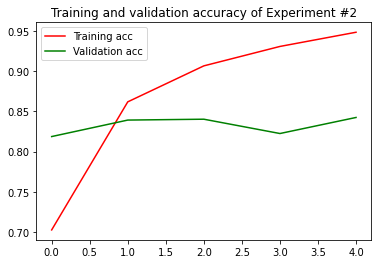

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #2')
plt.legend()

plt.figure()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
performanceArray = []



accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#1--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))




73/73 [==============================] - 0s 4ms/step
Experiment#1--> Accuracy:  0.8445975032285837  	Precision:  0.8228105906313645 	Recall:  0.8120603015075377 	F1-Score:  0.8174001011633789


**Experiment-2: RNN with an embedding layer and hidden layers (128,64, 32, 16) by Using Glove with 100d, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

path_to_glove_file = "/content/gdrive/MyDrive/MachineLearning/disaster_tweets/glove.6B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

embedding_dim = 100

vocabulary = text_vectorization.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i <10000:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
model = Sequential()
model.add(Embedding(max_features, 100,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,))

model.add(SimpleRNN(32))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1000000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_5 (Dense)             (None, 128)               4224      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)               

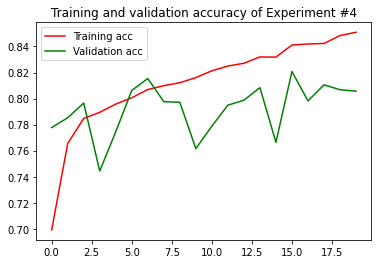

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #4')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#2--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))


73/73 [==============================] - 0s 4ms/step
Experiment#2--> Accuracy:  0.7765820060266896  	Precision:  0.7570194384449244 	Recall:  0.7045226130653266 	F1-Score:  0.7298282144716294


**Experiment-3: RNN with an embedding layer and  hidden layers (128, 64, 32, 16) by Using Glove-twitter with 100d, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:
path_to_glove_file = "/content/gdrive/MyDrive/MachineLearning/disaster_tweets/glove.twitter.27B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

embedding_dim = 100

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i <10000:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:

model = Sequential()
model.add(Embedding(10000, 100,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,))

model.add(SimpleRNN(32))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         1000000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense_10 (Dense)            (None, 128)               4224      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)               

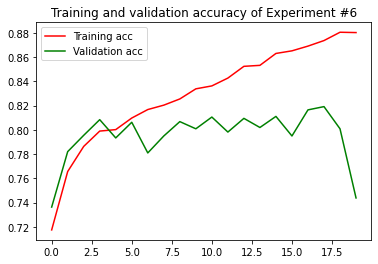

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #6')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#6--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))

73/73 [==============================] - 0s 4ms/step
Experiment#6--> Accuracy:  0.7318123116659492  	Precision:  0.8369565217391305 	Recall:  0.464321608040201 	F1-Score:  0.5972850678733033


**Experiment-4: RNN with an embedding layer and three hidden layers (128,64, 32,16) by Using fastex with 300d, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:
path_to_glove_file = "/content/gdrive/MyDrive/MachineLearning/disaster_tweets/wiki-news-300d-1M.vec"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

embedding_dim = 300

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i <10000:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(10000, 300,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,))

model.add(SimpleRNN(32))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=9,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         3000000   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                10656     
                                                                 
 dense_15 (Dense)            (None, 128)               4224      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)               

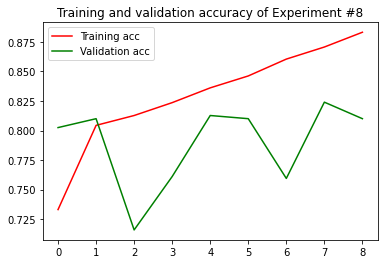

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #8')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#8--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))

73/73 [==============================] - 0s 4ms/step
Experiment#8--> Accuracy:  0.7671114937580714  	Precision:  0.7695961995249406 	Recall:  0.6512562814070352 	F1-Score:  0.7054980947196516


Now Moving to LSTM


**Experiment-5: LSTM with an embedding layer and hidden layers (128, 64, 32,16) to learn word embedding from the data, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:
max_features = 10000  # number of words to consider as features
maxlen = 28  # Cut texts after this number of words (among top max_features most common words)

model = Sequential()
model.add(Embedding(max_features, maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 28)          280000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               15616     
 l)                                                              
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                      

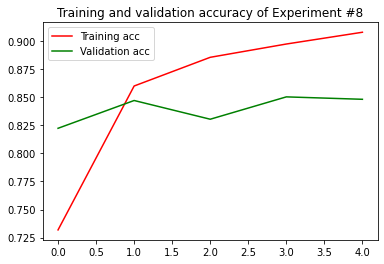

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #8')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#8--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))

73/73 [==============================] - 1s 3ms/step
Experiment#8--> Accuracy:  0.839431769263883  	Precision:  0.849438202247191 	Recall:  0.7597989949748744 	F1-Score:  0.8021220159151193


**Experiment-6: LSTM with an embedding layer and hidden layers (128, 64, 32,16) to learn word embedding from the glove, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:

path_to_glove_file = "/content/gdrive/MyDrive/MachineLearning/disaster_tweets/glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

embedding_dim = 100

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i <10000:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(Embedding(max_features, 100,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,))

model.add(Bidirectional(LSTM(32)))
model.add(Dense(128 , activation='relu' ))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=7,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                      

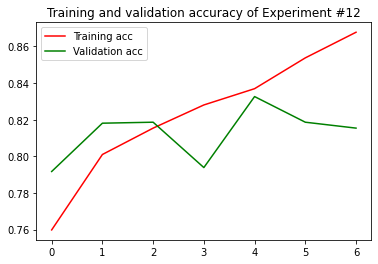

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #12')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#12--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))


73/73 [==============================] - 1s 3ms/step
Experiment#12--> Accuracy:  0.7804563065002152  	Precision:  0.7136563876651982 	Recall:  0.8140703517587939 	F1-Score:  0.7605633802816901


**Experiment-7: LSTM with an embedding layer and two hidden layers (128,64, 32,16) by Using Glove-twitter with 100d, keeping max feature size = 10000 and max length of each tweet 30 words**

In [ ]:
path_to_glove_file = "/content/gdrive/MyDrive/MachineLearning/disaster_tweets/glove.twitter.27B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

embedding_dim = 100

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i <10000:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:


model = Sequential()
model.add(Embedding(10000, 100,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,))

model.add(Bidirectional(LSTM(32)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         1000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                      

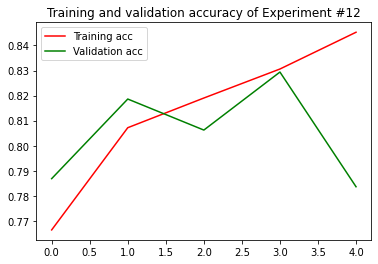

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #12')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#12--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))


73/73 [==============================] - 1s 3ms/step
Experiment#12--> Accuracy:  0.7636676711149376  	Precision:  0.935546875 	Recall:  0.4814070351758794 	F1-Score:  0.6357000663570006


**Experiment-8: LSTM with an embedding layer and two hidden layers (128,64, 32,16) by Using fastex with 300d, keeping max feature size = 10000 and max length of each tweet 30 words**


In [ ]:
path_to_glove_file = "/content/gdrive/MyDrive/MachineLearning/disaster_tweets/wiki-news-300d-1M.vec"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

embedding_dim = 300

word_index = dict(zip(vocabulary, range(len(vocabulary))))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i <10000:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:

model = Sequential()
model.add(Embedding(10000, 300,embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,))

model.add(Bidirectional(LSTM(32)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=7,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 300)         3000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               85248     
 nal)                                                            
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                      

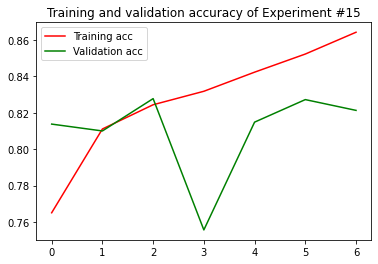

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #15')
plt.legend()

plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
performanceArray = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'rb'))

accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#15--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))

73/73 [==============================] - 1s 3ms/step
Experiment#15--> Accuracy:  0.7795953508394318  	Precision:  0.7276154571159283 	Recall:  0.7758793969849246 	F1-Score:  0.7509727626459143


WORKING ON BERT


In [ ]:
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 15.0 MB/s 
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 1.7 MB 70.6 MB/s 
     |████████████████████████████████| 439 kB 71.5 MB/s 
     |████████████████████████████████| 6.0 MB 47.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dense(128, name="dense-layer1")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer1")(d_layer)
d_layer = tf.keras.layers.Dense(64, name="dense-layer2")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer2")(d_layer)
d_layer = tf.keras.layers.Dense(32, name="dense-layer3")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer3")(d_layer)
d_layer = tf.keras.layers.Dense(16, name="dense-layer4")(d_layer)
d_layer = tf.keras.layers.Dropout(0.2, name="dropout-layer4")(d_layer)
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
model = tf.keras.Model(inputs=[text_input], outputs = [d_layer])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text-layer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text-layer[0][0]']             
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
X_train = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtrain3.pkl', 'rb'))
X_test = pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/xtest3.pkl', 'rb'))
y_train=pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/ytrain3.pkl', 'rb'))
y_test=pickle.load(open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/y_test3.pkl', 'rb'))

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                    validation_split = 0.2)


Epoch 1/50
59/59 [==============================] - 153s 2s/step - loss: 0.9797 - acc: 0.5700 - val_loss: 0.5895 - val_acc: 0.6991
Epoch 2/50
59/59 [==============================] - 140s 2s/step - loss: 0.7274 - acc: 0.6041 - val_loss: 0.5850 - val_acc: 0.7277
Epoch 3/50
59/59 [==============================] - 140s 2s/step - loss: 0.6808 - acc: 0.6249 - val_loss: 0.6349 - val_acc: 0.6394
Epoch 4/50
59/59 [==============================] - 139s 2s/step - loss: 0.6465 - acc: 0.6573 - val_loss: 0.8983 - val_acc: 0.5640
Epoch 5/50
59/59 [==============================] - 139s 2s/step - loss: 0.6405 - acc: 0.6667 - val_loss: 0.7866 - val_acc: 0.5673
Epoch 6/50
59/59 [==============================] - 139s 2s/step - loss: 0.6112 - acc: 0.6814 - val_loss: 0.7542 - val_acc: 0.5797
Epoch 7/50
59/59 [==============================] - 139s 2s/step - loss: 0.6140 - acc: 0.6865 - val_loss: 0.5633 - val_acc: 0.7191
Epoch 8/50
59/59 [==============================] - 141s 2s/step - loss: 0.5914 - a

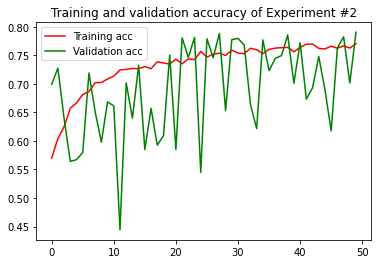

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy of Experiment #2')
plt.legend()

plt.figure()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
performanceArray = []



accuracy = accuracy_score(y_test,y_pred.round())
precision = precision_score(y_test,y_pred.round())
recall=recall_score(y_test,y_pred.round())
f1 = f1_score(y_test,y_pred.round())
performanceArray.append([accuracy,precision,recall,f1])
print('Experiment#1--> Accuracy: ',accuracy,' \tPrecision: ',precision,'\tRecall: ',recall,'\tF1-Score: ',f1)

# In order to store the performance( accuracy, precision, recall and F1) of each experiment 
pickle.dump(performanceArray, open('/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/performance2.pkl', 'wb'))




73/73 [==============================] - 25s 340ms/step
Experiment#1--> Accuracy:  0.7671114937580714  	Precision:  0.8101092896174863 	Recall:  0.5959798994974874 	F1-Score:  0.6867400115807759


SUMMARY

In [ ]:
df4 = pd.read_excel("/content/gdrive/MyDrive/MachineLearning/disaster_tweets/outputs/AUGT2.csv")  
df4

,Experiment Description,Accuracy,Precision,Recall,F1-Score
0,Eperiment# 1: Simple RNN,0.844598,0.822811,0.812060,0.817400
1,Eperiment# 2: RNN and pre-trained Glove word e,0.776582,0.757019,0.704523,0.729828
2,Eperiment# 3: RNN with and pre-trained twitt...,0.731812,0.836957,0.464322,0.597285
3,Eperiment# 4: RNN and pre-trained FastText wo,0.767111,0.769596,0.651256,0.705498
4,Eperiment# 5: Simple LSTM,0.839432,0.849438,0.759799,0.802122
5,Eperiment# 6: LSTM and pre-trained Glove word,0.780456,0.713656,0.814070,0.760563
6,Eperiment# 7: LSTM and pre-trained twitter-Glo.,0.763668,0.935547,0.481407,0.635700
7,Eperiment# 8: LSTM and pre-trained FastText wo...,0.779595,0.727615,0.775879,0.750973
8,Eperiment# 9: BERT,0.767111,0.810109,0.595980,0.686740
